<a href="https://colab.research.google.com/github/mrunalkute/linear_models_assignment/blob/main/A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

In [ ]:
#Clone the assignment
! git clone https://github.com/ds3001f25/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 18.05 KiB | 2.58 MiB/s, done.


**All of the work for Question 1 has been be submitted through a PDF document in GitHub.**

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [1]:
#Import networks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload the file
from google.colab import files

#open the file dialog
uploaded = files.upload()

df = pd.read_csv("heart_hw.csv")
df.head() #just to see if all of the stuff is there and it looks right!!

Saving heart_hw.csv to heart_hw.csv


,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [2]:
#Question 3.1:

#Part A
#Proportion surviving in the control group
control_survival = df.loc[df["transplant"] == "control", "y"].mean()

#Part B
#Proportion surviving in the treatment group
treatment_survival = df.loc[df["transplant"] == "treatment", "y"].mean()

#Average Treatment Effect (ATE) = difference
ate = treatment_survival - control_survival

#print everything out
print(f"(a) Control survival proportion: {control_survival:.3f}")
print(f"(b) Treatment survival proportion: {treatment_survival:.3f}")
print(f"Difference (ATE): {ate:.3f}")


(a) Control survival proportion: 0.118
(b) Treatment survival proportion: 0.348
Difference (ATE): 0.230


In [3]:
#Question 3.2:

#this is the package Overstack recommended me to use to make it easier
import statsmodels.api as sm

#Make a dummy variable where 1 = treatment, 0 = control
df["treat_dummy"] = (df["transplant"] == "treatment").astype(int)

# Regression where y ~ constant + treatment
X = sm.add_constant(df["treat_dummy"])  # adds intercept
model = sm.OLS(df["y"], X).fit()

#Print out the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Tue, 07 Oct 2025   Prob (F-statistic):             0.0133
Time:                        00:23:14   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1176      0.075      1.574      

**Question 3.2:**
The regression intercept is 0.118, which matches the survival rate in the control group. The coefficient on transplant is 0.230, which matches the difference in survival rates between treatment and control (the average treatment effect). In other words, the regression simply restates our earlier results: the intercept gives the baseline survival probability for those without a transplant, and the coefficient gives the added survival benefit for those who received one.

In [4]:
#Question 3.3:

#Regression: y ~ constant + transplant + age
X2 = sm.add_constant(df[["treat_dummy", "age"]])
model2 = sm.OLS(df["y"], X2).fit()  #This will run an OLS regression of survival (y) on a constant, transplant dummy, and age

#This will extract the estimated regression coefficients
intercept2 = model2.params["const"]
coef_treat2 = model2.params["treat_dummy"]
coef_age = model2.params["age"]

#Display all of the results + summary
intercept2, coef_treat2, coef_age, model2.summary()

(np.float64(0.7019569721740962),
 np.float64(0.2647016865036755),
 np.float64(-0.01360721716021866),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.147
 Model:                            OLS   Adj. R-squared:                  0.130
 Method:                 Least Squares   F-statistic:                     8.602
 Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000357
 Time:                        00:23:19   Log-Likelihood:                -54.558
 No. Observations:                 103   AIC:                             115.1
 Df Residuals:                     100   BIC:                             123.0
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t    

**Question 3.3:**

When age is added, the intercept rises from about 0.118 to 0.702. This happens because the intercept now represents the predicted survival probability for a patient with age = 0 in the control group, which is not realistic but is a mathematical baseline. The age coefficient is negative (–0.0136), showing that survival probability decreases with age, and the transplant effect remains positive (0.265). In short, including age shifts the intercept upward, but that intercept no longer corresponds to an average control survival rate so it’s adjusted to account for the linear effect of age.

Test AUC: 0.818


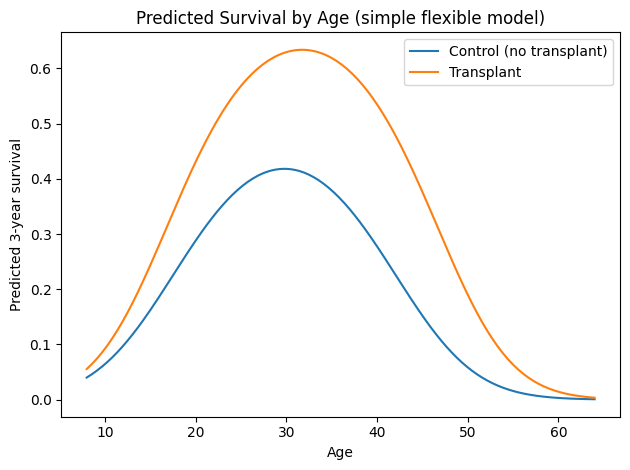

In [5]:
#Question #3.4
#I am going to reimport packages here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# I loaded the data and made a 0/1 treatment column
df = pd.read_csv("heart_hw.csv")
df["treat"] = (df["transplant"] == "treatment").astype(int)

X = df[["age", "treat"]].values
y = df["y"].values

#This will train/test split (so we can check we're not overfitting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

#This will add simple nonlinearity and interactions with a degree-2 polynomial
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# This code will just fit a basic logistic regression
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_poly, y_train)

#Quick check of test performance
test_auc = roc_auc_score(y_test, logit.predict_proba(X_test_poly)[:, 1])
print(f"Test AUC: {test_auc:.3f}")

# This Make smooth predictions across age for control (treat=0) and transplant (treat=1)
age_min, age_max = df["age"].min(), df["age"].max()
age_grid = np.linspace(age_min, age_max, 200)

X_ctrl = np.column_stack([age_grid, np.zeros_like(age_grid)])  # treat=0
X_trt  = np.column_stack([age_grid, np.ones_like(age_grid)])   # treat=1

X_ctrl_poly = poly.transform(X_ctrl)
X_trt_poly  = poly.transform(X_trt)

p_ctrl = logit.predict_proba(X_ctrl_poly)[:, 1]
p_trt  = logit.predict_proba(X_trt_poly)[:, 1]

#Plot everything + make it look pretty!!
plt.plot(age_grid, p_ctrl, label="Control (no transplant)")
plt.plot(age_grid, p_trt,  label="Transplant")
plt.xlabel("Age")
plt.ylabel("Predicted 3-year survival")
plt.title("Predicted Survival by Age (simple flexible model)")
plt.legend()
plt.tight_layout()
plt.show()

**Question 3.4**

The model shows that survival probability varies nonlinearly with age, peaking in early adulthood and declining at older ages. Transplant recipients generally have higher predicted survival than controls, especially between ages 20 and 45. At older ages, the benefit of a transplant narrows as overall survival decreases.

**Question 3.5**

Using predictive models to allocate organs raises serious concerns about data quality and bias. Historical data often reflects inequities in access to care and may encode proxy variables for race, income, or disability. A model trained on such data can look “accurate” yet still rank disadvantaged patients lower, amplifying ant past disparities. Also, outcomes in the data depend on who previously received transplants and follow-up care, not on an unbiased experiment, so the model may mistake treatment pathways and resource availability for the patient biology.

Deployment risks are also equally large. A high-stakes system needs human oversight, appeal mechanisms, and clear accountability with audit logs   Patients should be able to recieve an explanation for why they were ranked a certain way and how to contest errors, and privacy protections for sensitive health data. The policy layer matters: the model must be advisory; thresholds should be set with clinical, ethical, and community input; and the system should be regularly re-evaluated. In short, fairness, transparency, and governance are not add-ons but rather prerequisites before any algorithm influences transplant decisions.
